# Analyzing-Global-CO2 Emissions Data Visualisation

In [40]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
#read the data csv
df = pd.read_csv('owid-co2-data.csv')
display(df)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [42]:
#Check the NAs in the table
df.isna().sum()

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64

In [43]:
# Performing a sum calculation
pd.isna(df.iloc [0:]).sum()



country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64

In [44]:

columns_with_nas = df.columns[df.isna().any()] # Identify columns which have NAs 
nas_sum = df[columns_with_nas].isna().sum() # Count the number of NAs in each column

# Display the columns with NAs and their counts
for columns, count in nas_sum.items():
    display(f"{columns} - {count}")



'iso_code - 7929'

'population - 9172'

'gdp - 34940'

'cement_co2 - 21328'

'cement_co2_per_capita - 24833'

'co2 - 21054'

'co2_growth_abs - 23210'

'co2_growth_prct - 24189'

'co2_including_luc - 26606'

'co2_including_luc_growth_abs - 26906'

'co2_including_luc_growth_prct - 26906'

'co2_including_luc_per_capita - 26696'

'co2_including_luc_per_gdp - 33401'

'co2_including_luc_per_unit_energy - 40490'

'co2_per_capita - 24009'

'co2_per_gdp - 32663'

'co2_per_unit_energy - 39841'

'coal_co2 - 28436'

'coal_co2_per_capita - 29141'

'consumption_co2 - 45325'

'consumption_co2_per_capita - 45689'

'consumption_co2_per_gdp - 45747'

'cumulative_cement_co2 - 21350'

'cumulative_co2 - 22863'

'cumulative_co2_including_luc - 26606'

'cumulative_coal_co2 - 28436'

'cumulative_flaring_co2 - 34300'

'cumulative_gas_co2 - 32177'

'cumulative_luc_co2 - 12955'

'cumulative_oil_co2 - 24974'

'cumulative_other_co2 - 46989'

'energy_per_capita - 40082'

'energy_per_gdp - 42495'

'flaring_co2 - 34239'

'flaring_co2_per_capita - 35497'

'gas_co2 - 32177'

'gas_co2_per_capita - 32899'

'ghg_excluding_lucf_per_capita - 14552'

'ghg_per_capita - 14378'

'land_use_change_co2 - 12955'

'land_use_change_co2_per_capita - 13757'

'methane - 12781'

'methane_per_capita - 14378'

'nitrous_oxide - 11911'

'nitrous_oxide_per_capita - 13871'

'oil_co2 - 24973'

'oil_co2_per_capita - 25755'

'other_co2_per_capita - 47717'

'other_industry_co2 - 46989'

'primary_energy_consumption - 40040'

'share_global_cement_co2 - 28231'

'share_global_co2 - 22863'

'share_global_co2_including_luc - 26606'

'share_global_coal_co2 - 28436'

'share_global_cumulative_cement_co2 - 28231'

'share_global_cumulative_co2 - 22863'

'share_global_cumulative_co2_including_luc - 26606'

'share_global_cumulative_coal_co2 - 28436'

'share_global_cumulative_flaring_co2 - 39322'

'share_global_cumulative_gas_co2 - 35157'

'share_global_cumulative_luc_co2 - 12955'

'share_global_cumulative_oil_co2 - 26599'

'share_global_cumulative_other_co2 - 48083'

'share_global_flaring_co2 - 39322'

'share_global_gas_co2 - 35157'

'share_global_luc_co2 - 12955'

'share_global_oil_co2 - 26599'

'share_global_other_co2 - 48083'

'share_of_temperature_change_from_ghg - 9190'

'temperature_change_from_ch4 - 12131'

'temperature_change_from_co2 - 9190'

'temperature_change_from_ghg - 9190'

'temperature_change_from_n2o - 12131'

'total_ghg - 12781'

'total_ghg_excluding_lucf - 12955'

'trade_co2 - 45656'

'trade_co2_share - 45656'

In [45]:
# Mean Average from key metrics
avg_population = df["population"].mean(skipna=True).round(0)  # Calculate the average population, skipping NAs and rounding it to the nearest whole number
print(f"The average population is: {avg_population}")  # Print the average population (avg_population)

avg_co2 = df["co2"].mean(skipna=True).round(0)  # Calculate the average population, skipping NAs and rounding it to the nearest whole number
print(f"The co2 population is: {avg_co2}")  # Print the average population (avg_co2)

avg_meth = df["methane"].mean(skipna=True).round(0)  # Calculate the average population, skipping NAs and rounding it to the nearest whole number
print(f"The methane Concentration is: {avg_meth}")  # Print the average population (avg_meth)

avg_oil_Co2 = df["oil_co2"].mean(skipna=True).round(0)  # Calculate the average population, skipping NAs and rounding it to the nearest whole number
print(f"The oil Co2 Concentration is: {avg_oil_Co2}")  # Print the average population (avg_oil_Co2)

avg_nitrogen_oxide = df["nitrous_oxide"].mean(skipna=True).round(0)  # Calculate the average population, skipping NAs and rounding it to the nearest whole number
print(f"The Nitrogen Oxide Concentration is: {avg_nitrogen_oxide}")  # Print the average population (avg_nitrogen)


The average population is: 56861409.0
The co2 population is: 416.0
The methane Concentration is: 102.0
The oil Co2 Concentration is: 115.0
The Nitrogen Oxide Concentration is: 26.0


In [46]:
# Median Average from key metrics
median_ghg_per_capita = df["ghg_per_capita"].median(skipna=True)  # Calculate the median ghg_per_capita, skipping NAs
print(f"The median ghg per capita is: {median_ghg_per_capita}")  # Print the median ghg per capita

median_primary_energy_consumption = df["primary_energy_consumption"].median(skipna=True).round(0)
print(f"The median primary energy consumption is: {median_primary_energy_consumption}")

median_energy_per_capita = df["energy_per_capita"].median(skipna=True).round(0)
print(f"The median energy per capita is: {median_energy_per_capita}")

median_co2_per_capita = df["co2_per_capita"].median(skipna=True).round(0)
print(f"The median co2 per capita is: {median_co2_per_capita}")

median_gdp = df["gdp"].median(skipna=True).round(0)  
print(f"The median gdp is: {median_gdp}")



The median ghg per capita is: 4.291
The median primary energy consumption is: 68.0
The median energy per capita is: 13071.0
The median co2 per capita is: 1.0
The median gdp is: 27438614528.0


In [47]:
#Range calcuation

range_population = df["population"].max() - df["population"].min()  # Calculate the range of population
print(f"The range of population is: {range_population}")  # Print the range of population

range_temperature_change_from_co2 = df["temperature_change_from_co2"].max() - df["temperature_change_from_co2"].min() 
print(f"The range of temperature change from co2 is: {range_temperature_change_from_co2}")


range_temperature_change_from_ghg = df["temperature_change_from_ghg"].max() - df["temperature_change_from_ghg"].min() 
print(f"The range of temperature change from CH4 is: {range_temperature_change_from_ghg}")

range_temperature_change_from_n2o = df["temperature_change_from_n2o"].max() - df["temperature_change_from_n2o"].min() 
print(f"The range of temperature change from n2o is: {range_temperature_change_from_n2o}")

range_temperature_change_from_ch4 = df["temperature_change_from_ch4"].max() - df["temperature_change_from_ch4"].min() 
print(f"The range of temperature change from CH4 is: {range_temperature_change_from_ch4}")



The range of population is: 8091734720.0
The range of temperature change from co2 is: 1.161
The range of temperature change from CH4 is: 1.6689999999999998
The range of temperature change from n2o is: 0.085
The range of temperature change from CH4 is: 0.423


In [48]:
#Filter for years after 1990 and countries with non-null CO2 emissions.
display(df)

df['year'] = pd.to_datetime(df['year'], format='%Y')  # Convert 'year' to datetime format
#df.loc[df['year'] >= '1990', 'year']


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [49]:
co2_1990 = df[df['year'] >= '1990']   # Filter for years after 1990
display(co2_1990)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
240,Afghanistan,1990-01-01,AFG,12045664.0,1.306598e+10,0.046,0.004,2.024,-0.741,-26.784,...,NaN,0.094,0.000,0.000,0.001,0.0,13.892,4.218,NaN,NaN
241,Afghanistan,1991-01-01,AFG,12238879.0,1.204736e+10,0.046,0.004,1.914,-0.110,-5.435,...,NaN,0.092,0.000,0.000,0.001,0.0,14.178,4.207,NaN,NaN
242,Afghanistan,1992-01-01,AFG,13278982.0,1.267754e+10,0.046,0.003,1.482,-0.432,-22.580,...,NaN,0.090,0.000,0.000,0.001,0.0,12.514,3.853,NaN,NaN
243,Afghanistan,1993-01-01,AFG,14943174.0,9.834582e+09,0.047,0.003,1.487,0.005,0.330,...,NaN,0.089,0.000,0.000,0.001,0.0,11.804,4.021,NaN,NaN
244,Afghanistan,1994-01-01,AFG,16250799.0,7.919857e+09,0.047,0.003,1.454,-0.033,-2.227,...,NaN,0.087,0.000,0.000,0.001,0.0,12.282,4.159,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019-01-01,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020-01-01,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021-01-01,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022-01-01,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [50]:
co2_1990_null = df[(df['year'] >= '1990') & (df['co2'].isna())]

# Filter for years after 1990 and countries with null CO2 emissions
display(co2_1990_null)



,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
10025,Christmas Island,1990-01-01,CXR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
10026,Christmas Island,1991-01-01,CXR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
10027,Christmas Island,1992-01-01,CXR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
10028,Christmas Island,1993-01-01,CXR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
13289,East Timor,1990-01-01,TLS,760348.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.009,0.0,0.0,0.0,0.0,5.847,0.138,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,Vatican,2019-01-01,VAT,543.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48770,Vatican,2020-01-01,VAT,536.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48771,Vatican,2021-01-01,VAT,527.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48772,Vatican,2022-01-01,VAT,513.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#- Handle missing values (e.g., impute population using median or drop rows).
df = df.dropna(subset=["population"])  # Drop rows where 'population' is NaN
display(df)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750-01-01,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,1760-01-01,AFG,2866255.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Afghanistan,1770-01-01,AFG,2931397.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Afghanistan,1780-01-01,AFG,2998019.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Afghanistan,1790-01-01,AFG,3066156.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019-01-01,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020-01-01,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021-01-01,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022-01-01,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [52]:
#- Create a new column for CO2 per capita 
df.insert(8, "co2_per_capita_calc", np.where(df["population"] > 0, df["co2"] / df["population"], 0))
df = df.dropna(subset=["population"])  # Drop rows where 'population' is NaN

# Create a new column for CO2 per capita
display(df)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_per_capita_calc,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750-01-01,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,1760-01-01,AFG,2866255.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Afghanistan,1770-01-01,AFG,2931397.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Afghanistan,1780-01-01,AFG,2998019.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Afghanistan,1790-01-01,AFG,3066156.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019-01-01,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,6.720416e-07,-0.942,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020-01-01,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,5.471154e-07,-1.768,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021-01-01,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,6.459364e-07,1.709,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022-01-01,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,6.487622e-07,0.221,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [ ]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica']
df_continents = df[df['country'].isin(continents)]
display(df_continents)



,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_per_capita_calc,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
274,Africa,1750-01-01,NaN,80349715.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Africa,1760-01-01,NaN,80866461.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,Africa,1770-01-01,NaN,81456617.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,Africa,1780-01-01,NaN,82126790.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Africa,1785-01-01,NaN,82381934.0,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42503,South America,2019-01-01,NaN,423548289.0,NaN,41.060,0.097,1084.626,0.000003,6.916,...,2.094,9.181,0.045,0.093,0.144,0.006,3812.943,1527.522,-74.449,-6.864
42504,South America,2020-01-01,NaN,426213551.0,NaN,41.313,0.097,979.441,0.000002,-105.185,...,2.166,9.153,0.045,0.094,0.146,0.007,3752.928,1411.788,-12.195,-1.245
42505,South America,2021-01-01,NaN,428331420.0,NaN,46.898,0.110,1079.731,0.000003,100.290,...,2.120,9.125,0.046,0.096,0.148,0.007,3982.018,1516.688,-30.086,-2.786
42506,South America,2022-01-01,NaN,430492814.0,NaN,47.104,0.109,1096.153,0.000003,16.422,...,2.121,9.089,0.046,0.097,0.149,0.007,3892.277,1537.734,-27.286,-2.489


In [62]:
# Create a new 'continents' column based on whether 'country' is in the continents list
df['continents'] = np.where(df['country'].isin(continents), df['country'], np.nan)
display(df)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_per_capita_calc,co2_growth_abs,...,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,continent,continents
0,Afghanistan,1750-01-01,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,1760-01-01,AFG,2866255.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Afghanistan,1770-01-01,AFG,2931397.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Afghanistan,1780-01-01,AFG,2998019.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Afghanistan,1790-01-01,AFG,3066156.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019-01-01,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,6.720416e-07,-0.942,...,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261,NaN,NaN
50187,Zimbabwe,2020-01-01,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,5.471154e-07,-1.768,...,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209,NaN,NaN
50188,Zimbabwe,2021-01-01,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,6.459364e-07,1.709,...,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280,NaN,NaN
50189,Zimbabwe,2022-01-01,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,6.487622e-07,0.221,...,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018,NaN,NaN


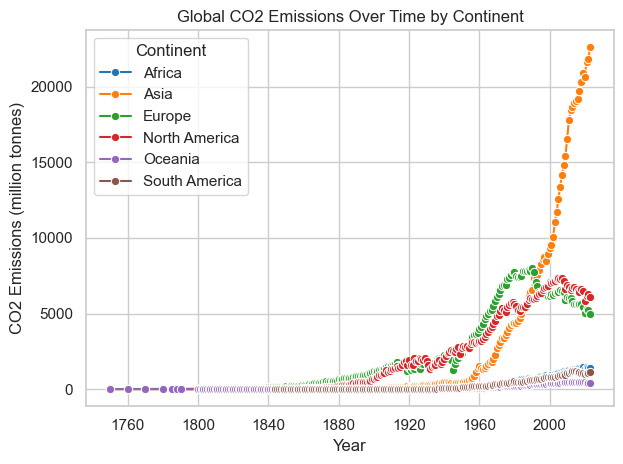

In [70]:
sns.set_theme(style="whitegrid", palette="tab10")
ax = sns.lineplot(
    data=df_continents,
    x="year",
    y="co2",
    hue="country",  # Each continent is in the 'country' column for df_continents
    marker="o"
)
ax.set(
    title="Global CO2 Emissions Over Time by Continent",
    xlabel="Year",
    ylabel="CO2 Emissions (million tonnes)"
)
plt.legend(title="Continent")
plt.tight_layout()
plt.show()

In [ ]:
   
    #- Create a Seaborn boxplot of CO2 per capita by continent.
    
    
    #- Use Seaborn to plot a scatterplot of CO2 vs. GDP with regression line.